# King County Airbnb

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

Arthur Macintosh, a local businessman, reached out to our company Airbnb Musketeers and asked for us to help him purchase a home in King County, Washington. Mr. Macintosh listed specific characteristics that he wanted his house in King County to have. The following characteristics were :  , at least 2 bedrooms, and 2 bathrooms. The goal of this data analysis is to give Mr.Macintosh an idea of how much he should expect to spend on a house in King County with the specific characteristics that he 
The data that we used originally consisted of 21,597 houses that were built between 1900 and 2015. We narrowed down the amount of data to 19,662 houses.
The methods being used are train-test-split, OLS models, .

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.


Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

- Cleaned up data by 
    - 
- Scaled data 
- Determined business model 
- Examined individual relationships with price and create visualizations 

# Imports 

In [31]:
import pandas as pd 
from IPython.display import Markdown, display
import itertools
import numpy as np
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels 
import statsmodels.api as sm 
import pickle 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Data Clean Up

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [12]:
md = display(Markdown("data/column_names.md"))

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [14]:
df = df.drop(columns=['id','date','waterfront','view','grade','lat','condition','long'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21597 non-null  object 
 8   yr_built       21597 non-null  int64  
 9   yr_renovated   17755 non-null  float64
 10  zipcode        21597 non-null  int64  
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 2.1+ MB


In [16]:
df.drop(columns='price')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,1340,5650
1,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,1690,7639
2,2,1.00,770,10000,1.0,770,0.0,1933,NaN,98028,2720,8062
3,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,1360,5000
4,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,98103,1530,1509
21593,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,98146,1830,7200
21594,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,98144,1020,2007
21595,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,98027,1410,1287


In [48]:
df['yr_built'].sort_values()

8849     1900
14522    1900
14555    1900
14783    1900
8996     1900
         ... 
643      2015
19789    2015
21317    2015
19943    2015
8418     2015
Name: yr_built, Length: 8830, dtype: int64

In [17]:
df = df.dropna()

In [18]:
df = df.drop(df[df['sqft_basement'].str.contains(r'[?]')].index)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,98053,4760,101930


In [20]:
X = df.drop(columns='price')
y = df['price']

In [24]:
#ss = StandardScaler()
#X_scaled = ss.fit()

In [25]:
tv_model = sm.OLS(y.astype(float), X.astype(float)).fit()
tv_model_summ = tv_model.summary()

In [26]:
tv_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          1.002e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        14:39:49   Log-Likelihood:                     -2.4024e+05
No. Observations:               17389   AIC:                                  4.805e+05
Df Residuals:                   17378   BIC:                                  4.806e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -6.481e+04   2469.504    -26.244      0.000   -6.96e+04      -6e+04
bathrooms      6.919e+04   4334.150     15.964      0.000    6.07e+04    7.77e+04
sqft_living     170.1203      2.818     60.371      0.000     164.597     175.644
sqft_lot         -0.0232      0.063     -0.370      0.711      -0.146       0.099
floors         5.222e+04   4674.157     11.171      0.000    4.31e+04    6.14e+04
sqft_above       83.4234      2.811     29.676      0.000      77.913      88.934
sqft_basement    86.6970      3.374     25.697      0.000      80.084      93.310
yr_built      -3468.8255     81.619    -42.500      0.000   -3628.807   -3308.844
yr_renovated     25.4875      4.835      5.271      0.000      16.010      34.965
zipcode          67.9838      1.602     42.447      0.000      64.844      71.123
sqft_living15    91.0729      4.267     21.344      0.000      82.709      99.437
sqft_lot15       -0.6179      0.097     -6.386      0.000      -0.808      -0.428
==============================================================================
Omnibus:                    12892.173   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           662947.655
Skew:                           3.057   Prob(JB):                         0.00
Kurtosis:                      32.624   Cond. No.                     1.26e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.12e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
df = df.loc[df['floors']>1]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,1690,7639
9,323000.0,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,98038,2390,7570
14,530000.0,5,2.00,1810,4850,1.5,1810,0.0,1900,0.0,98107,1360,4850
15,650000.0,4,3.00,2950,5000,2.0,1980,970.0,1979,0.0,98126,2140,4000
16,395000.0,3,2.00,1890,14040,2.0,1890,0.0,1994,0.0,98019,1890,14018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,98103,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,98027,1410,1287


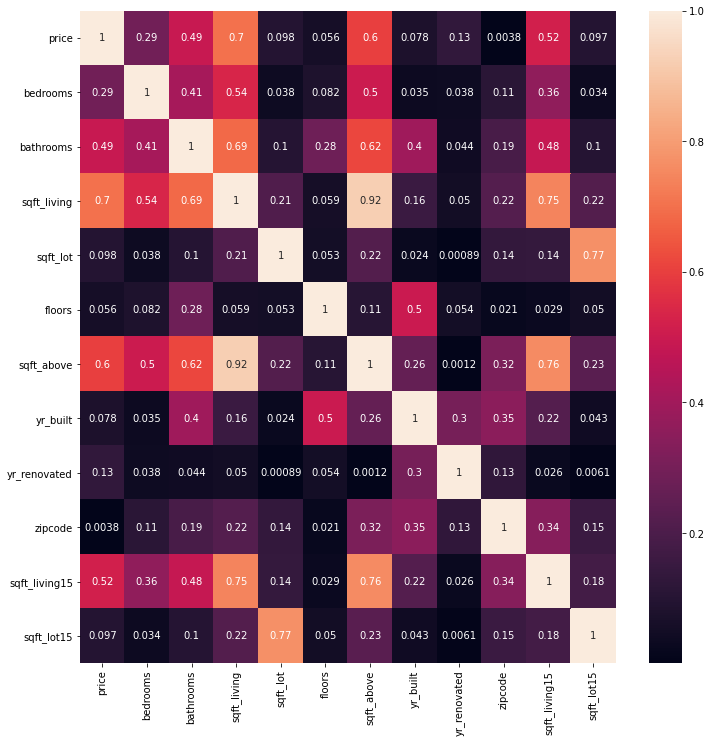

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:
- What variables were kept?
    - price 
    - bedrooms
    - bathrooms
    - sqft_living
    - floor
    - yr built
    - zip code 
- Were there variables you dropped or created?
    - id 
    - date 
    - sqft_lot
    - waterfront 
    - view
    - condition
    - grade
    - sqft_above
    - sqft_basement
    - yr_ renovated
    - lat
    - long 
    - sqft_living15
    - sqft_lot15
- How did you address missing values or outliers?
    - We dropped null values including question marks. 
- Why are these choices appropriate given the data and the business problem?
    - It was appropriate to drop the variables above because they did not have 
      numeric values and would not fit in our model
    - It was appropriate to drop null values since 
- How much of the data have we dropped?
    - After dropping nulls, question marks, and houses built only after the data went from 21,597 to 638 
    - We reduced the amount of data that we are working with by implementing a limit of 

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?